In [36]:
import base64
from PIL import Image
import cv2
import requests
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import copy

Populating the interactive namespace from numpy and matplotlib


In [11]:
image = 'forest.jpg'
f = open(image,'rb')

In [10]:
f.read()

b''

In [12]:
img_b64 = base64.b64encode(f.read())

In [ ]:
img_b64

In [14]:
origin_data = base64.b64decode(img_b64)

In [ ]:
origin_data

In [ ]:
im = Image.open('code.png')

with open('code.jpg','wb') as f:
    res = requests.get('http://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
    f.write(res.content)


im = Image.open('code.jpg').convert('RGB')
open_cv_image = np.array(im)

im2=Image.open('code.jpg')
im2
open_cv_image


plt.imshow(open_cv_image)

# 转为灰度图
imgray = cv2.cvtColor(open_cv_image,cv2.COLOR_BGR2GRAY)
# 
ret,thresh =cv2.threshold(imgray,127,255,0)
# plt.imshow(thresh)

contour,hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE),
type(hierarchy)
len(contour)

thresh

cnts = sorted([(c,cv2.boundingRect(c)[0]) for c in contour],key=lambda x:x[1])

arr=[],
for (c,_) in cnts:
    (x,y,w,h) =cv2.boundingRect(c)
    print(((x,y,w,h)))

In [5]:
# RGB 去噪
img =Image.open('clipboard.png')

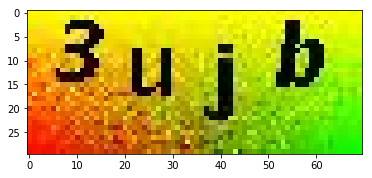

In [14]:
plt.imshow(img)

In [6]:
img.mode

'RGBA'

In [8]:
np_img = np.array(img)

In [10]:
np_img.shape

(30, 70, 4)

In [11]:
np_img[0,0,:]

array([255, 250,   7, 255], dtype=uint8)

In [12]:
np_img

array([[[255, 250,   7, 255],
        [255, 249,   5, 255],
        [255, 246,   5, 255],
        ...,
        [243, 255,   0, 255],
        [240, 253,   0, 255],
        [246, 255,   3, 255]],

       [[255, 243,   0, 255],
        [255, 243,   0, 255],
        [255, 242,   6, 255],
        ...,
        [245, 255,   2, 255],
        [244, 255,   1, 255],
        [247, 255,   4, 255]],

       [[236, 248,   0, 255],
        [241, 245,   0, 255],
        [249, 239,  17, 255],
        ...,
        [242, 253,   0, 255],
        [243, 254,   0, 255],
        [241, 252,   0, 255]],

       ...,

       [[255,  32,   4, 255],
        [246,  25,   0, 255],
        [255,  36,   6, 255],
        ...,
        [ 31, 246,   2, 255],
        [ 29, 249,   1, 255],
        [ 28, 251,   0, 255]],

       [[243,  17,   0, 255],
        [243,  17,   0, 255],
        [247,  23,   0, 255],
        ...,
        [ 23, 246,   0, 255],
        [ 22, 248,   0, 255],
        [ 22, 251,   0, 255]],

       [[240

In [13]:
img.getpixel((0,0))

(255, 250, 7, 255)

In [15]:
rgb_img = img.convert('RGB')

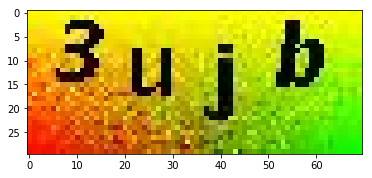

In [16]:
plt.imshow(rgb_img)

In [17]:
rgb_img.mode

'RGB'

In [19]:
w,h = rgb_img.size

In [20]:
w

70

In [21]:
h

30

In [22]:
R=0
G=0
B=0
for i in range(w):
    for j in range(h):
        r,g,b = rgb_img.getpixel((i,j))
        R=R+r
        G=G+g
        B=B+b        

In [23]:
R

362002

In [24]:
G

356780

In [25]:
B

25911

In [26]:
total=R+G+B

In [28]:
r_rate=R/total*100
g_rate=G/total*100
b_rate=B/total*100

In [29]:
r_rate

48.61090409067898

In [30]:
b_rate

3.4794203785989666

In [31]:
g_rate

47.909675530722055

In [34]:
copy_img = np.zeros((w,h))

In [35]:
copy_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
rgb_img_copy = copy.copy(rgb_img)

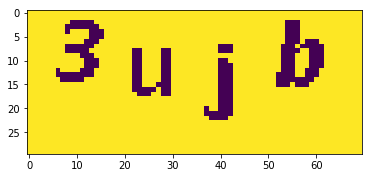

In [58]:
# rgb_img_copy = copy.copy(rgb_img)
rgb_img_copy=np.zeros((h,w))
for i in range(w):
    for j in range(h):
        r,g,b = rgb_img.getpixel((i,j))
        n = (r*r_rate+ b*b_rate+g*g_rate)/100
#         print(n)
        if n>40:
            rgb_img_copy[j,i]=255
#             rgb_img_copy[i,j]=[255,255,255]

        else:
            rgb_img_copy[j,i]=0
            
plt.imshow(rgb_img_copy)